# AIDM7330 Group Project

Group Name: Patrol Paw


*   Zhu Xiaoyu 23422041
*   Luo Fan 23435968

*   He Minlong 23421541
*   Huang Chongkai 23436069

# Introduction
This project uses basic data analysis methods to show the specific performance of Hong Kong and mainland universities in the world rankings, including implementing higher-ranked universities in various academic assessments and geographical distribution.

## Preparation

In [ ]:
import pandas as pd
import folium
import json
from IPython.display import IFrame
import warnings
warnings.filterwarnings(action='ignore', category=RuntimeWarning)

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## Connected data

In [ ]:
from google.colab import drive
drivePath = '/content/drive' #please do not change
drive.mount(drivePath)

Mounted at /content/drive


In [ ]:
# Install the library on your environment
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=41870c5984e57ffbc2c61ce6f915c77acc5bfa6ab2c024dc0bc35b9c5e40ae6a
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
# Import the library
import wget

# Setup URL and path variables
baseURL = 'https://kweakkk.github.io/'
doc = 'HK-2021-2023.csv'
fullURL = baseURL + doc

dataPath = drivePath + '/MyDrive/Colab Notebooks/data'

# Download the file
fileName1 = wget.download(fullURL, out=dataPath)

# Print the file name including the local path
print(fileName1)

/content/drive/MyDrive/Colab Notebooks/data/HK-2021-2023 (1).csv


In [ ]:
# Setup URL and path variables
baseURL = 'https://kweakkk.github.io/'
doc = 'China_mainland_-2021-2023_1_.csv'
fullURL = baseURL + doc

dataPath = drivePath + '/MyDrive/Colab Notebooks/data'

# Download the file
fileName2 = wget.download(fullURL, out=dataPath)

# Print the file name including the local path
print(fileName2)

/content/drive/MyDrive/Colab Notebooks/data/China_mainland_-2021-2023_1_ (1).csv


## Check the Data

In [ ]:
#Hong Kong data
hk=pd.read_csv(fileName1)

In [ ]:
#mainland data
mainland=pd.read_csv(fileName2)

In [ ]:
hk.tail(5)

,Year,World_rank,University_name,Region,Overall_score,International_student_ratio,Academic_reputation,Employer_reputation
13,2023,38,The Chinese University of Hong Kong (CUHK),"Central Ave, Sha Tin District, Hong Kong SAR",80.6,90.5,87.3,49.6
14,2023,40,The Hong Kong University of Science and Techno...,"Clear Water Bay, Hong Kong SAR",79.8,87.9,82.0,50.1
15,2023,54,City University of Hong Kong,"Tat Chee Avenue, Kowloon, Hong Kong SAR",73.6,100.0,57.3,29.4
16,2023,65,The Hong Kong Polytechnic University,"Hung Hom, Kowloon, Hong Kong SAR",69.0,80.7,66.1,37.0
17,2023,281,Hong Kong Baptist University,"Kowloon Tong, Kowloon,, Hong Kong SAR",36.3,100.0,17.0,12.8


In [ ]:
mainland.tail(5)

,Year,World_rank,University_name,Region,Overall_score,International_student_ratio,Academic_reputation,Employer_reputation
74,2023,422,Xiamen University,Xiamen,27.3,3.8,23.9,8.8
75,2023,428,University of Science and Technology Beijing,Beijing,27.1,3.4,13.1,3.4
76,2023,443,Beihang University (former BUAA),Beijing,26.3,5.5,13.1,4.4
77,2023,461,Southeast University,Nanjing,25.5,3.9,11.1,6.0
78,2023,497,Jilin University,Jilin,24.3,2.4,13.5,44.5


## Explore the data structure

In [ ]:
hk.columns

Index(['Year', 'World_rank', 'University_name', 'Region', 'Overall_score',
       'International_student_ratio', 'Academic_reputation',
       'Employer_reputation'],
      dtype='object')

In [ ]:
mainland.columns

Index(['Year', 'World_rank', 'University_name', 'Region', 'Overall_score',
       'International_student_ratio', 'Academic_reputation',
       'Employer_reputation'],
      dtype='object')

In [ ]:
hk.info

<bound method DataFrame.info of     Year  World_rank                                    University_name  \
0   2021          22                        The University of Hong Kong   
1   2021          27  The Hong Kong University of Science and Techno...   
2   2021          43         The Chinese University of Hong Kong (CUHK)   
3   2021          48                       City University of Hong Kong   
4   2021          75               The Hong Kong Polytechnic University   
5   2021         264                       Hong Kong Baptist University   
6   2022          22                        The University of Hong Kong   
7   2022          34  The Hong Kong University of Science and Techno...   
8   2022          39         The Chinese University of Hong Kong (CUHK)   
9   2022          53                       City University of Hong Kong   
10  2022          66               The Hong Kong Polytechnic University   
11  2022         287                       Hong Kong Baptist Univers

## Data exploration and visualization

#### Q1: What is the change in the rankings of QS 500 mainland Chinese universities in the world?

In [ ]:
data = pd.read_csv(fileName2)

rank_change_data = data.pivot(index='University_name', columns='Year', values='World_rank')

# Calculate the rank change between 2021 and 2023
rank_change_data['Rank_Change_2021_to_2023'] = rank_change_data[2021] - rank_change_data[2023]

# Sort the universities based on rank change
rank_change_data_sorted = rank_change_data.sort_values(by='Rank_Change_2021_to_2023', ascending=False).reset_index()

rank_change_data_sorted.head()


Year,University_name,2021,2022,2023,Rank_Change_2021_to_2023
0,Southern University of Science and Technology,323.0,275.0,226.0,97.0
1,Huazhong University of Science and Technology,396.0,334.0,306.0,90.0
2,Shandong University,485.0,403.0,396.0,89.0
3,Tianjin University,387.0,334.0,307.0,80.0
4,South China University of Technology,462.0,407.0,406.0,56.0


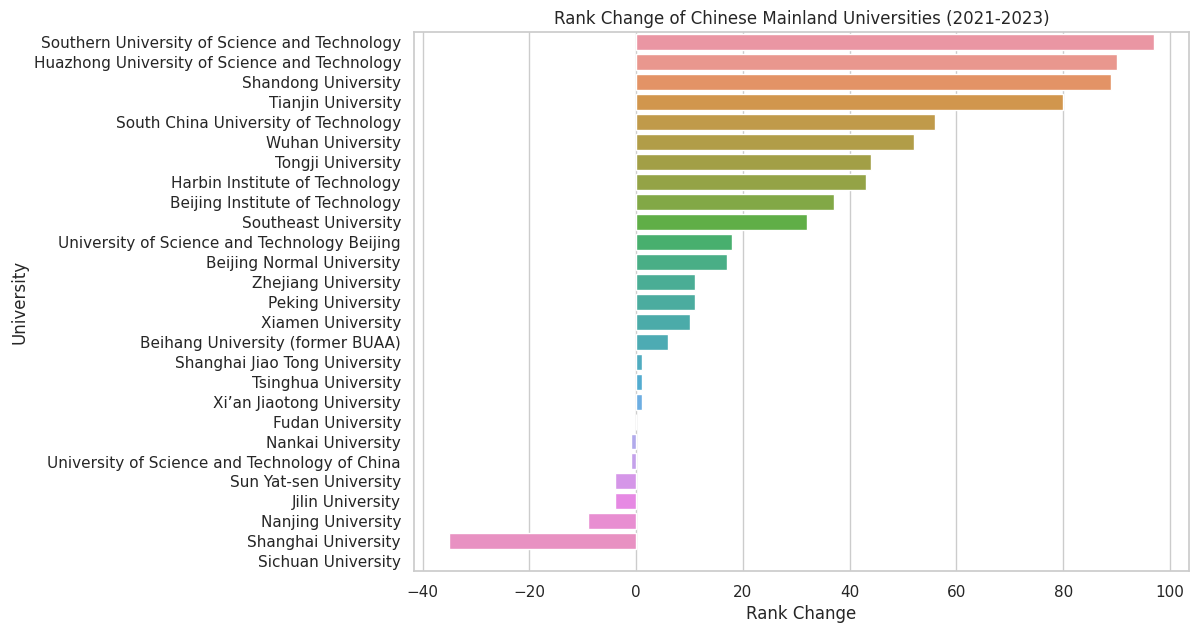

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 7))
sns.barplot(data=rank_change_data_sorted, x='Rank_Change_2021_to_2023', y='University_name')
plt.title('Rank Change of Chinese Mainland Universities (2021-2023)')
plt.xlabel('Rank Change')
plt.ylabel('University')
plt.show()


Finding：We can find some universities that have significantly improved their rankings over a three-year period. For example, the rankings of Southern University of Science and Technology and Huazhong University of Science and Technology have improved most significantly, improving by 97 and 90 places respectively; the ranking of Shanghai University has dropped by about 40 places; the rankings of Nankai University and Fudan University have been relatively stable.

#### Q2: What is the comprehensive score of universities in different cities from 2021 to 2023?

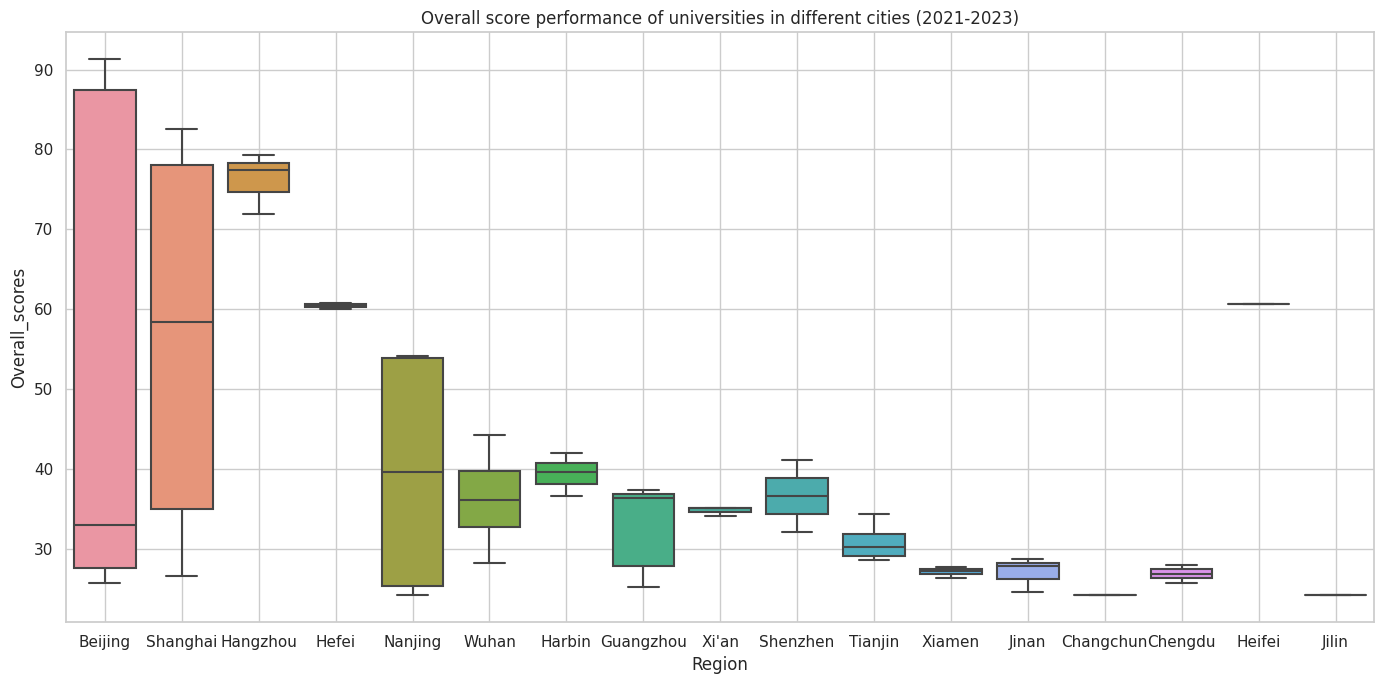

In [ ]:
data = pd.read_csv(fileName2)
plt.figure(figsize=(14, 7))
sns.boxplot(x='Region', y='Overall_score', data=data)

plt.title('Overall score performance of universities in different cities (2021-2023)')
plt.xlabel('Region')
plt.ylabel('Overall_scores')

plt.grid(True)
plt.tight_layout()
plt.show()


Findings：The median comprehensive scores of universities in Beijing and Shanghai are higher, indicating that universities in these cities perform better overall. The median score of universities in Hangzhou is around 70, which is similar to Shanghai, but the IQR is narrower, indicating that the score distribution is more concentrated. For Jinan, the box plot is very short, indicating that the scores of universities in this city are concentrated and low.

Q3：What is the relationship between academic reputation and world rank?

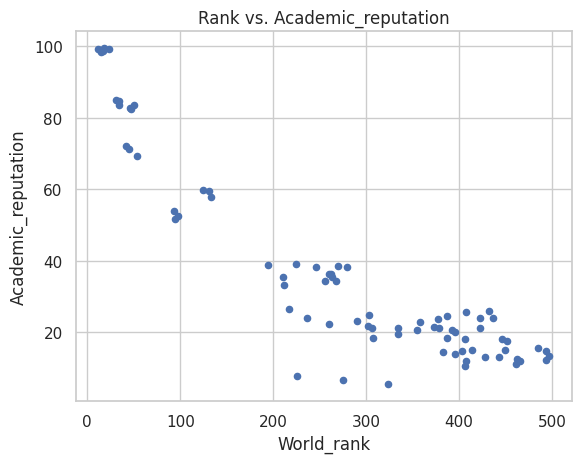

In [ ]:
mainland.plot(kind = 'scatter', x = 'World_rank', y = 'Academic_reputation', title = 'Rank vs. Academic_reputation')
plt.show()

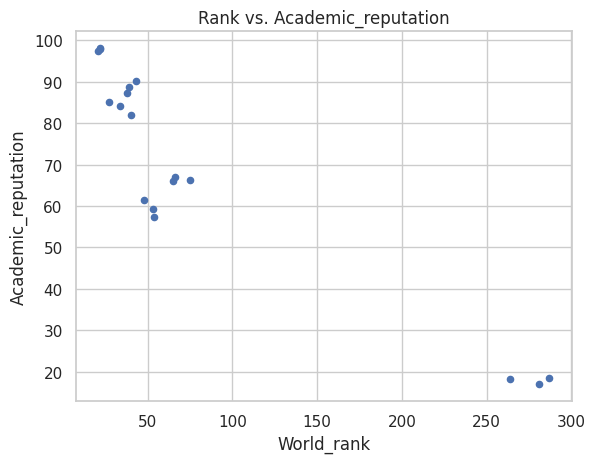

In [ ]:
hk.plot(kind = 'scatter', x = 'World_rank', y = 'Academic_reputation', title = 'Rank vs. Academic_reputation')
plt.show()

Finding:On the whole, the scatter plots of the two regions show a negative correlation trend; that is, the lower the ranking, the higher the academic reputation. This trend may indicate that academic standing is crucial in university rankings.
However, there are outliers in both charts, suggesting that some universities have a high academic reputation but are not ranked as well as others. For example, on the HK scatter chart, universities ranked in the 50-100 range have an academic reputation of nearly 70 points. In contrast, universities in the top 50 have the academic reputation of about 60 points. This could be for various reasons, such as the assessment of academic standing being influenced by other factors or some particular situation in the ranking algorithm.

Q4: What is the geographical distribution of university rankings in Hong Kong and the mainland?

In [ ]:
hk.World_rank.value_counts()

22     2
66     1
65     1
54     1
40     1
38     1
21     1
287    1
53     1
27     1
39     1
34     1
264    1
75     1
48     1
43     1
281    1
Name: World_rank, dtype: int64

In [ ]:
mainland.World_rank.value_counts()

334    2
406    2
396    2
387    2
260    2
      ..
211    1
225    1
236    1
270    1
497    1
Name: World_rank, Length: 70, dtype: int64

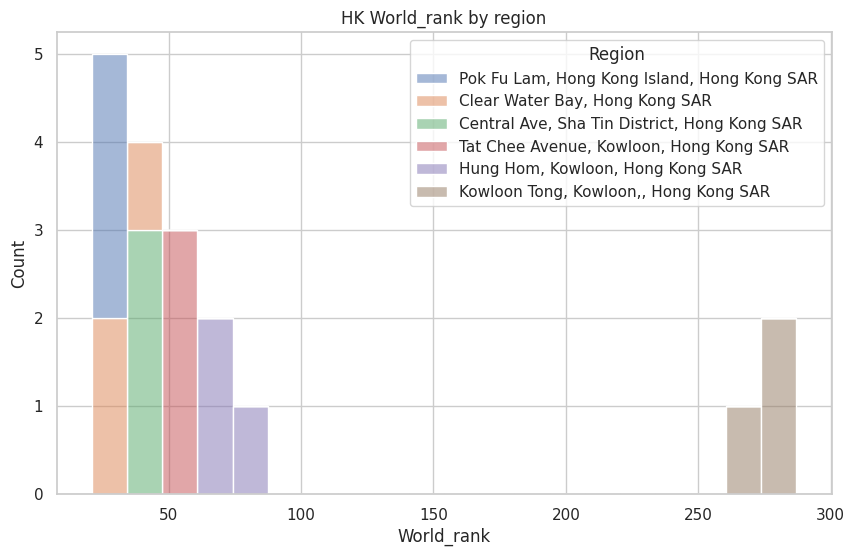

In [ ]:
# showing different groups
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=hk, x='World_rank', hue='Region', multiple='stack', bins=20, alpha=0.5, legend='brief')
plt.title('HK World_rank by region')
plt.show()



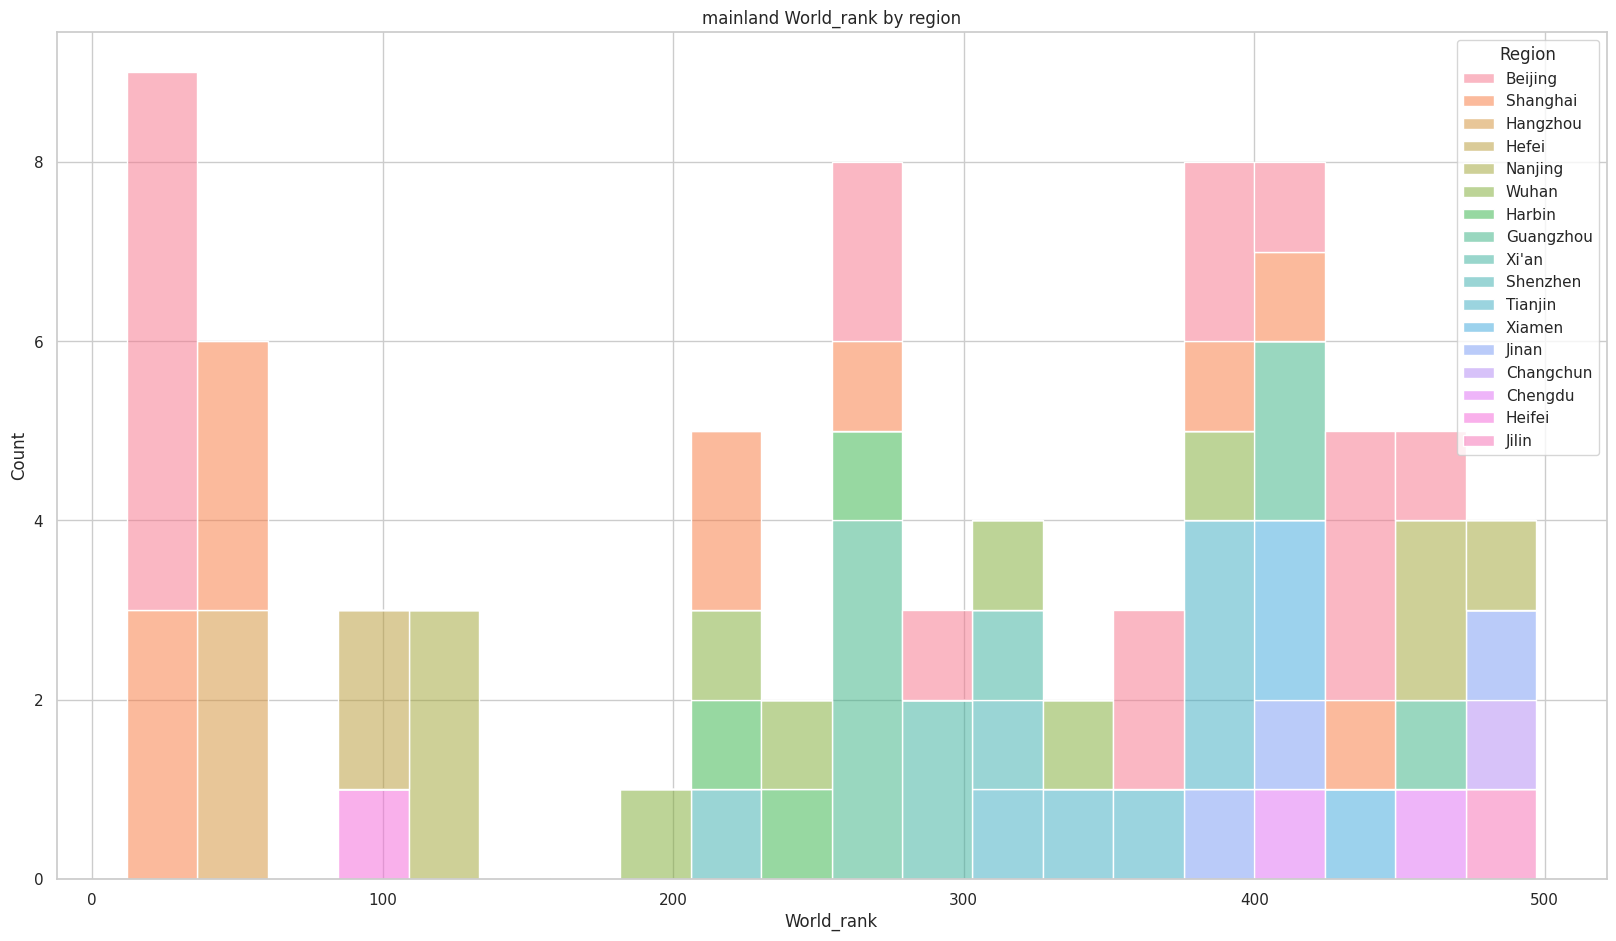

In [ ]:
# showing different groups
import seaborn as sns

plt.figure(figsize=(20, 11))
sns.histplot(data=mainland, x='World_rank', hue='Region', multiple='stack', bins=20, alpha=0.5, legend='brief')
plt.title('mainland World_rank by region')
plt.show()




Finding:The analysis indicates higher university rankings in Hong Kong's administrative regions, showcasing the superior standing of its universities globally.  Mainland China's administrative regions exhibit a more dispersed distribution, reflecting variations in university rankings.
In Hong Kong, top-ranked universities concentrate in Pok Fu Lam and Hong Kong Island, reflecting moderately centralized educational resources.  Mainland China's administrative areas show a more uniform ranking distribution, with Beijing hosting the highest distribution of top-ranked universities, boasting nine institutions in the top 100.
These ranking differences may arise from regional variations in education policies, investment, and academic research levels.  

Q5: What are the trends in the ranking of the top 500 schools in the Continental QS over the past three years?

In [ ]:
mainland_universities = mainland.groupby('University_name').size()
print(mainland_universities.index)
mainlandNumUniversities = len(mainland_universities)
print('num of mainland universities:',mainlandNumUniversities)

Index(['Beihang University (former BUAA)', 'Beijing Institute of Technology',
       'Beijing Normal University', 'Fudan University',
       'Harbin Institute of Technology',
       'Huazhong University of Science and Technology', 'Jilin University',
       'Nanjing University', 'Nankai University', 'Peking University',
       'Shandong University', 'Shanghai Jiao Tong University',
       'Shanghai University', 'Sichuan University',
       'South China University of Technology', 'Southeast University',
       'Southern University of Science and Technology',
       'Sun Yat-sen University', 'Tianjin University', 'Tongji University',
       'Tsinghua University', 'University of Science and Technology Beijing',
       'University of Science and Technology of China', 'Wuhan University',
       'Xiamen University', 'Xi’an Jiaotong University',
       'Zhejiang University'],
      dtype='object', name='University_name')
num of mainland universities: 27


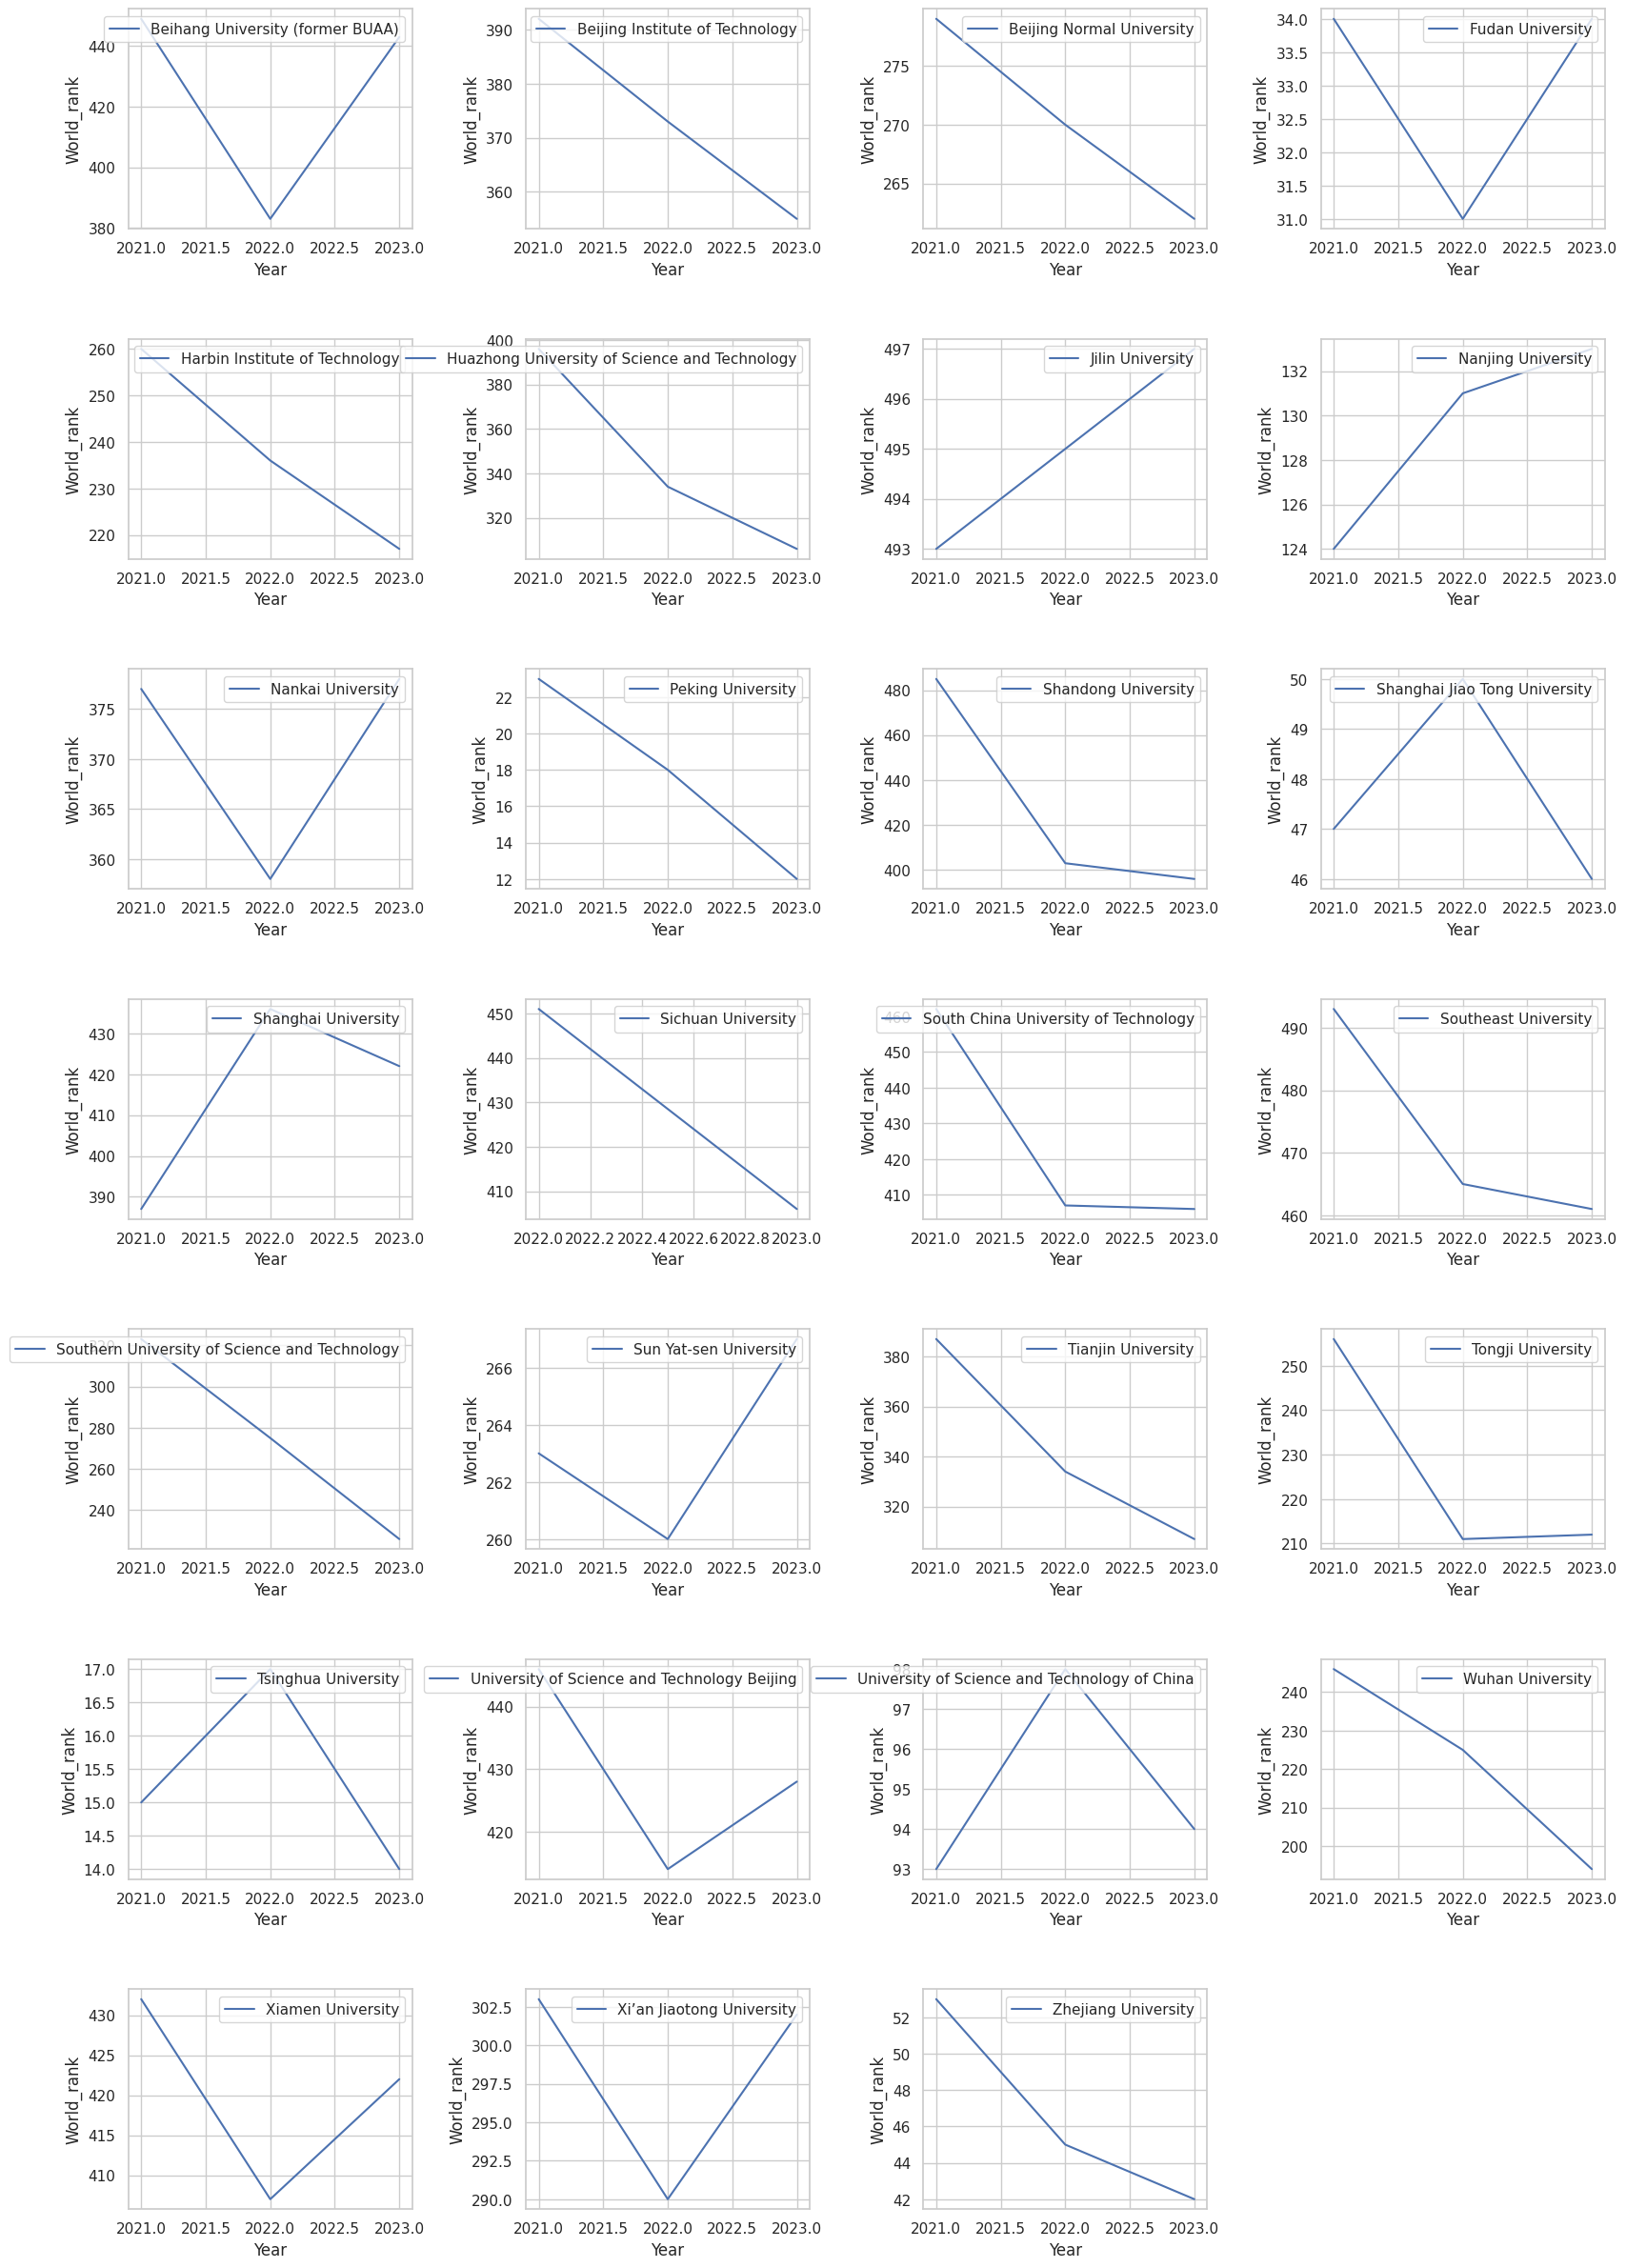

In [ ]:
fig = plt.figure(figsize=(20,120))
fig.subplots_adjust(hspace=0.5, wspace = 0.4)
n = 1
for university in mainland_universities.index:
    ax = fig.add_subplot(mainlandNumUniversities,4,n)
    x = mainland[mainland['University_name'] == university]['Year']
    y = mainland[mainland['University_name'] == university]['World_rank']
    ax.plot(x,y)
    ax.set_xlabel('Year',fontsize=12)
    ax.set_ylabel('World_rank',fontsize=12)
    ax.legend([university],loc = 'upper right') #title
    n = n+1

plt.show()

Finding: Based on the data analysis, we can find that a considerable number of universities experienced a shift in upward or downward trend in 2022, such as Nankai University and Shanghai Jiaotong University; some schools experienced a certain change in the magnitude of the change even though the trend remained the same, such as Zhejiang University and Wuhan University. In addition, Beijing Normal University and Southern University of Science and Technology have maintained a consistent slope downward over the three years. Through this analysis, we can observe the specific trends of the continental university rankings in these three years, which can help to understand the change trends of specific universities.

## Word Cloud Diagram




In [ ]:
pip install wordcloud


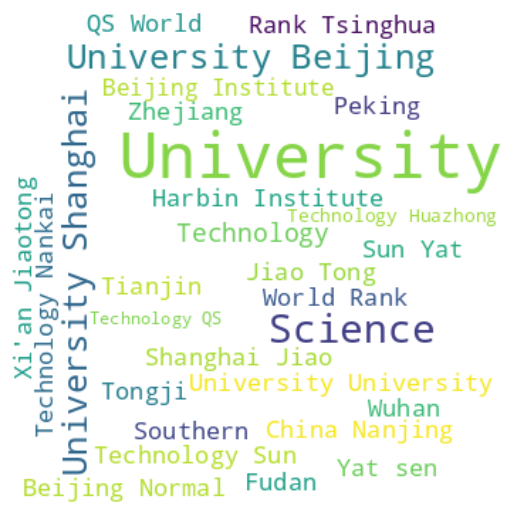

In [ ]:
from wordcloud import WordCloud

university_names = ["QS World Rank","Tsinghua University", "Peking University", "Fudan University",
    "Shanghai Jiao Tong University", "Zhejiang University",
    "University of Science and Technology of China", "Nanjing University",
    "Wuhan University", "Tongji University", "Harbin Institute of Technology",
    "Sun Yat-sen University", "Beijing Normal University",
    "Xi'an Jiaotong University", "Southern University of Science and Technology",
    "Nankai University", "Shanghai University", "Tianjin University",
    "Beijing Institute of Technology", "Huazhong University of Science and Technology",]

text = " ".join(university_names * 10)
wordcloud = WordCloud(
    width=700, height=700,
    background_color='white',
    min_font_size=10,
    max_words=200,
    scale=0.5).generate(text)

plt.figure(figsize=(7, 5), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0.1)
plt.show()

## Map Visualization

**Map1**:The distribution of QS500 universities in China mainland and Hong Kong

Get the data and geographical file.

In [ ]:
#import china geojson
baseURL = 'https://kweakkk.github.io/'
doc = 'china (1).json'
fullURL = baseURL + doc

dataPath = drivePath + '/MyDrive/Colab Notebooks/data'

# Download the file
mapLayer = wget.download(fullURL, out=dataPath)

# Print the file name including the local path
print(mapLayer)

/content/drive/MyDrive/Colab Notebooks/data/china (1) (1).json


In [ ]:
mapLayer

'/content/drive/MyDrive/Colab Notebooks/data/china (1) (1).json'

In [ ]:
#import china geojson
baseURL = 'https://kweakkk.github.io/'
doc = 'distribution.csv'
fullURL = baseURL + doc

dataPath = drivePath + '/MyDrive/Colab Notebooks/data'

# Download the file
data_distribution = wget.download(fullURL, out=dataPath)

# Print the file name including the local path
print(data_distribution)

/content/drive/MyDrive/Colab Notebooks/data/distribution (1).csv


In [ ]:
mainlandHK_geo = r'/content/drive/MyDrive/Colab Notebooks/data/china (1).json'

In [ ]:
mainlandHK_proportion=pd.read_csv(data_distribution)

In [ ]:
mainlandHK_proportion.head(10)

,Eng_name,university_number,proportion
0,Xinjiang,0,0.000000
1,Tibet,0,0.000000
2,Neimenggu,0,0.000000
3,Qinghai,0,0.000000
4,Sichuan,1,0.029412
5,Heilongjiang,1,0.029412
6,Gansu,0,0.000000
7,Yunnan,0,0.000000
8,Guangxi,0,0.000000
9,Shaanxi,1,0.029412


Make the labels of map

In [ ]:
import json

with open(mainlandHK_geo, encoding="utf8") as f:
    map_data = json.load(f)


In [ ]:
[key for key in map_data]

['type', 'features']

In [ ]:
[key for key in map_data['features'][0]]

['type', 'properties', 'geometry']

In [ ]:
[key for key in map_data['features'][0]['geometry']]

['type', 'coordinates']

In [ ]:
[key for key in map_data['features'][0]['properties']]

['id', 'size', 'name', 'cp', 'childNum']

In [ ]:
print(map_data['features'][0]['properties'])

{'id': '65', 'size': '550', 'name': 'Xinjiang', 'cp': [84.9023, 42.148], 'childNum': 18}


In [ ]:
json_map_file = []
for i in range(len(map_data['features'])):
    json_map_file.append(map_data['features'][i]['properties']['name'])
json_map_file = pd.DataFrame({'Sort_Index': range(len(map_data['features'])), 'Eng_name': json_map_file})
mainlandHK_proportion = mainlandHK_proportion.merge(json_map_file, on='Eng_name')
#mainlandHK_proportion = mainlandHK_proportion.drop(columns=['Sort_Index_x', 'Sort_Index_y'])#if feedback said duplicate Sort_Index can execute this line
mainlandHK_proportion = mainlandHK_proportion.sort_values(by=['Sort_Index']).reset_index(drop=True)
mainlandHK_proportion

,Eng_name,university_number,proportion,Sort_Index
0,Xinjiang,0,0.000000,0
1,Tibet,0,0.000000,1
2,Neimenggu,0,0.000000,2
3,Qinghai,0,0.000000,3
4,Sichuan,1,0.029412,4
5,Heilongjiang,1,0.029412,5
6,Gansu,0,0.000000,6
7,Yunnan,0,0.000000,7
8,Guangxi,0,0.000000,8
9,Hunan,1,0.029412,9


In [ ]:
tooltip_text = []
for Sort_Index in range(len(world_proportion)):
    tooltip_text.append(world_proportion['Eng_name'][Sort_Index]+' '+
                        str(int(round(mainlandHK_proportion['proportion'][Sort_Index]*100)))+'%')
tooltip_text

['Xinjiang 0%',
 'Tibet 0%',
 'Neimenggu 0%',
 'Qinghai 0%',
 'Sichuan 3%',
 'Heilongjiang 3%',
 'Gansu 0%',
 'Yunnan 0%',
 'Guangxi 0%',
 'Hunan 3%',
 'Shaanxi 3%',
 'Guangdong 6%',
 'Jilin 0%',
 'Hebei 0%',
 'Hubei 6%',
 'Guizhou 0%',
 'Shandong 3%',
 'Jiangxi 0%',
 'Henan 0%',
 'Liaoning 0%',
 'Shanxi 0%',
 'Anhui 0%',
 'Fujian 3%',
 'Zhejiang 0%',
 'Jiangsu 6%',
 'Chongqing 0%',
 'Ningxia 0%',
 'Hainan 0%',
 'Taiwan 0%',
 'Beijing 18%',
 'Tianjin 6%',
 'Shanghai 12%',
 'HongKong 18%',
 'Macau 3%']

In [ ]:
for idx in range(len(tooltip_text)):
    map_data['features'][idx]['properties']['tooltip1'] = tooltip_text[idx]

In [ ]:
print(map_data['features'][32]['properties'])

{'id': '81', 'size': '18000', 'name': 'HongKong', 'cp': [114.1178, 22.3242], 'childNum': 1, 'tooltip1': 'HongKong 18%'}


In [ ]:
#save the tooltip
with open('china (1).json', 'w') as output:
    json.dump(map_data, output)

Make the distribution map

Q6:What is the distribution on map of QS500 universities of China mainland and Hong Kong in 2023?

In [ ]:
mainland_HK_geo=map_data
map1 = folium.Map([39.9, 116.3], tiles='cartodbpositron', zoom_start=4)
tiles = ['stamenwatercolor', 'cartodbpositron', 'openstreetmap', 'stamenterrain']
folium.GeoJson(mapLayer).add_to(map1)
for tile in tiles:
    folium.TileLayer(tile).add_to(map1)


choropleth = folium.Choropleth(
    geo_data= mainland_HK_geo,
    name = 'choropleth',
    data = mainlandHK_proportion,
    columns = ['Eng_name','university_number','proportion'],
    key_on = 'feature.properties.name',
    fill_color = 'YlGn',
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = '2023 China mainland and HK QS500 Universities Distribution',
    highlight = True
).add_to(map1)

folium.LayerControl().add_to(map1)
# Display Region Label
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['tooltip1'], labels=False)
)

In [ ]:
map1

In [ ]:
#save the map
map1.save('map1.html')

Finding: Based on the map visualization, in 2023, We can find that most of the QS500 universities in China are concentrated in the eastern and central regions of China, where the regions with the most universities are Beijing, Shanghai, and Hong Kong, which account for 18%, 12% and 18% respectively. In addition, Hubei Province, Guangdong Province, Jiangsu Province and Tianjin each account for 6%, so we can deduce that these places are richer in educational resources compared to other regions. In contrast, many provinces in the west have 0%, but it could also be related to the fact that some Chinese universities do not participate in the QS ranking.

**Map2**:the relevant universities of Hong Kong's map

In [ ]:
import pandas as pd
import folium
import json
from IPython.display import IFrame
import warnings
warnings.filterwarnings(action='ignore', category=RuntimeWarning)
from folium.plugins import MarkerCluster

In [ ]:
baseURL = 'https://kweakkk.github.io/'
doc = 'data.xlsx'
fullURL = baseURL + doc

dataPath = drivePath + '/MyDrive/Colab Notebooks/data'

# Download the file
filename3 = wget.download(fullURL, out=dataPath)

# Print the file name including the local path
print(filename3)

/content/drive/MyDrive/Colab Notebooks/data/data (1).xlsx


In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/data/data.xlsx")
data = data[data.Year==2023].copy()
data.head()

,Year,World_rank,University_name,long,lat,Coordinates,Region,Overall_score,International_student_ratio,Academic_reputation,Employer_reputation
12,2023,21,The University of Hong Kong,114.1366,22.2831,"22.2831° N, 114.1366° E","Pok Fu Lam, Hong Kong Island, Hong Kong SAR",87.0,98.7,97.4,62.9
13,2023,38,The Chinese University of Hong Kong (CUHK),114.2068,22.4196,"22.4196° N, 114.2068° E","Central Ave, Sha Tin District, Hong Kong SAR",80.6,90.5,87.3,49.6
14,2023,40,The Hong Kong University of Science and Techno...,114.2634,22.3375,"22.3375° N, 114.2634° E","Clear Water Bay, Hong Kong SAR",79.8,87.9,82.0,50.1
15,2023,54,City University of Hong Kong,114.1727,22.3370,"22.3370° N, 114.1727° E","Tat Chee Avenue, Kowloon, Hong Kong SAR",73.6,100.0,57.3,29.4
16,2023,65,The Hong Kong Polytechnic University,114.1796,22.3046,"22.3046° N, 114.1796° E","Hung Hom, Kowloon, Hong Kong SAR",69.0,80.7,66.1,37.0


In [ ]:
boulder_coords = [22.38, 114.15]

#Create the map
my_map = folium.Map(location = boulder_coords, zoom_start = 10)

#Display the map
my_map

for index, row in data.iterrows():
    lat = row["lat"]
    lon = row["long"]
    name =  row["University_name"]
    rank= row["World_rank"]
    folium.Marker([lat, lon], popup = "Name: " + name + "<br>" + "Rank: " + str(rank) +"<br>Overall score" + str(row["Overall_score"] )).add_to(my_map)
my_map

Finding: As shown in the map previously, 18% of QS500 universities are located in Hong Kong. Based on the map visualization, we can find that there are many top universities in Hong Kong, strategically located throughout Hong Kong. Among them, in addition to the University of Hong Kong on Hong Kong Island, there are three universities in Kowloon and two universities in the New Territories. When the mouse is placed at the address represented by the university, we can see that the school's name, QS ranking and overall score are displayed above.

# Result
The three-year analysis of university rankings in Hong Kong and mainland China unveils significant trends.  Hong Kong universities consistently secure higher rankings, whereas mainland Chinese universities exhibit a more diverse distribution influenced by regional factors.  The negative correlation between rankings and academic reputation underscores the pivotal role of academic standing, yet outliers hint at additional influencing factors.  The map underscores the concentration of universities in eastern and central China, particularly in Beijing, Shanghai, and Hong Kong, suggesting a concentration of educational resources in these regions.

Specific university examinations, such as Nankai University, Shanghai Jiaotong University, Zhejiang University, and Wuhan University, provide nuanced insights into the evolving academic landscape.  This comprehensive analysis sheds light on the factors impacting university rankings and the regional dynamics that shape academic excellence.

# Workload Distribution

Participation completion status：   

Zhu Xiaoyu (Project Proposal, Data Processing, Chart, Slide)       

Luo Fan   (Project Proposal, Data Processing, Chart, Map1, Slide)     

He Minglong (Project Proposal, Data Processing, Chart, Slide)       

Huang Chongkai （Data Processing, Map2, Slide）